Курсовой проект по ресурсу iMBD:
- Проверить гипотезу: зависит ли бюджет фильма от жанра
- Проверить гипотезу: зависит ли рейтинг фильма от рейтинга актёра главной роли
- Найти моду, медиану, дисперсию бюджета по десятилетиям
- В идеале, хотел бы определить вероятность увеличения бюджетов фильмов по странам.

# Зависит ли бюджет фильма от жанра?

In [15]:
import os
import numpy as np
import pandas as pd

In [16]:
def load_movie_data(MOVIE_PATH):
    csv_path = os.path.join(MOVIE_PATH)
    return pd.read_csv(csv_path)

In [17]:
movie_train = load_movie_data("movie_metadata.csv")

In [18]:
movie_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [19]:
features_1 = ['budget', 'genres']
movie_budget = movie_train[features_1]

In [20]:
genre = movie_budget['genres'].nunique   
genre

<bound method IndexOpsMixin.nunique of 0       Action|Adventure|Fantasy|Sci-Fi
1              Action|Adventure|Fantasy
2             Action|Adventure|Thriller
3                       Action|Thriller
4                           Documentary
                     ...               
5038                       Comedy|Drama
5039       Crime|Drama|Mystery|Thriller
5040              Drama|Horror|Thriller
5041               Comedy|Drama|Romance
5042                        Documentary
Name: genres, Length: 5043, dtype: object>

In [21]:
for item in movie_budget.index:
    for i, let in enumerate(movie_budget.loc[item, 'genres']):
        if let == '|':
            movie_budget.loc[item, 'genres'] = movie_budget.loc[item, 'genres'][:i]
            break
            
movie_budget['genres']

D:\anaconda3\envs\machine_learning\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


0            Action
1            Action
2            Action
3            Action
4       Documentary
           ...     
5038         Comedy
5039          Crime
5040          Drama
5041         Comedy
5042    Documentary
Name: genres, Length: 5043, dtype: object

In [22]:
movie_budget['budget'] = movie_budget['budget'].fillna(movie_budget['budget'].median())

D:\anaconda3\envs\machine_learning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   budget  5043 non-null   float64
 1   genres  5043 non-null   object 
dtypes: float64(1), object(1)
memory usage: 78.9+ KB


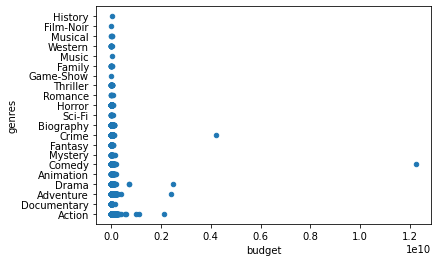

In [24]:
movie_budget.plot(kind="scatter", x="budget", y="genres")

In [25]:
# Для оценки зависимости с помощью корреляции, нам необходимо избавиться от выбросов

for i in movie_budget.index:
    if movie_budget.loc[i, 'budget'] > 0.3e9:    
        movie_budget.loc[i, 'budget'] = movie_budget['budget'].median()

In [26]:
movie_budget

,budget,genres
0,237000000.0,Action
1,300000000.0,Action
2,245000000.0,Action
3,250000000.0,Action
4,20000000.0,Documentary
...,...,...
5038,20000000.0,Comedy
5039,20000000.0,Crime
5040,1400.0,Drama
5041,20000000.0,Comedy


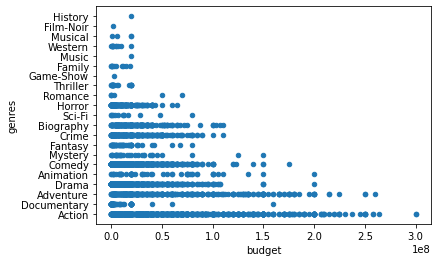

In [27]:
movie_budget.plot(kind="scatter", x="budget", y="genres")

In [28]:
# Для оценки зависимости будет использован корреляционный анализ
m1, m2 = movie_budget['genres'].factorize()

np.corrcoef(m1, movie_budget['budget'])

array([[ 1.        , -0.32264587],
       [-0.32264587,  1.        ]])

##### Исходя из представленных данных можно утверждать, что бюджет фильма незначительно зависит от жанра.

# Зависит ли рейтинг фильма от рейтинга актёра главной роли?

Нулевая гипотеза: рейтинг фильма равен рейтингу актёра

Гипотеза: рейтинг фильма больше рейтинга актёра

In [42]:
features_2 = ['actor_1_facebook_likes', 'movie_facebook_likes']
movie_rate = movie_train[features_2]

In [43]:
movie_rate

,actor_1_facebook_likes,movie_facebook_likes
0,1000.0,33000
1,40000.0,0
2,11000.0,85000
3,27000.0,164000
4,131.0,0
...,...,...
5038,637.0,84
5039,841.0,32000
5040,0.0,16
5041,946.0,660


In [32]:
movie_rate['actor_1_facebook_likes'] = movie_rate['actor_1_facebook_likes'].fillna(movie_rate['actor_1_facebook_likes'].median())

D:\anaconda3\envs\machine_learning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
movie_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   actor_1_facebook_likes  5043 non-null   float64
 1   movie_facebook_likes    5043 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 78.9 KB


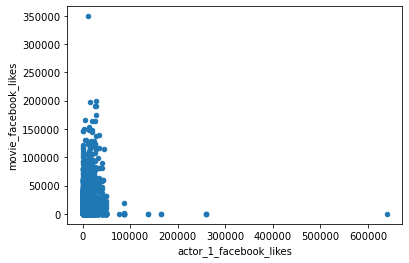

In [35]:
movie_rate.plot(kind="scatter", x="actor_1_facebook_likes", y="movie_facebook_likes")

In [38]:
# Исключим выбросы
movie_rate[movie_rate['movie_facebook_likes'] > 250000] = movie_rate['movie_facebook_likes'].median()
movie_rate[movie_rate['actor_1_facebook_likes'] > 70000] = movie_rate['actor_1_facebook_likes'].median()

D:\anaconda3\envs\machine_learning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda3\envs\machine_learning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


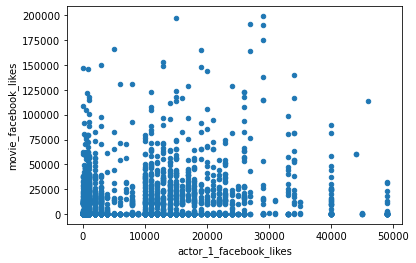

In [39]:
movie_rate.plot(kind="scatter", x="actor_1_facebook_likes", y="movie_facebook_likes")

In [40]:
# Для оценки зависимости будет использован корреляционный анализ
np.corrcoef(movie_rate['actor_1_facebook_likes'], movie_rate['movie_facebook_likes'])

array([[1.       , 0.2558347],
       [0.2558347, 1.       ]])

##### Исходя из представленных данных можно утверждать, что рейтинг фильма незначительно зависит от рейтинга актёра.

# Найти моду, медиану, дисперсию бюджета по десятилетиям

In [41]:
movie_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [45]:
features_3 = ['title_year', 'budget']
movie_year = movie_train[features_3]
movie_year

,title_year,budget
0,2009.0,237000000.0
1,2007.0,300000000.0
2,2015.0,245000000.0
3,2012.0,250000000.0
4,NaN,NaN
...,...,...
5038,2013.0,NaN
5039,NaN,NaN
5040,2013.0,1400.0
5041,2012.0,NaN


In [63]:
movie_year = movie_year.dropna(axis=0)

In [64]:
movie_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4543 entries, 0 to 5042
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title_year  4543 non-null   float64
 1   budget      4543 non-null   float64
dtypes: float64(2)
memory usage: 106.5 KB


In [65]:
years_1990_2000 = []
years_2001_2010 = []
years_2011_2020 = []

for i in movie_year.index:
    if movie_year.loc[i, 'title_year'] > 1989 and movie_year.loc[i, 'title_year'] < 2001:
        years_1990_2000.append(movie_year.loc[i, 'budget'])
    elif movie_year.loc[i, 'title_year'] > 2000 and movie_year.loc[i, 'title_year'] < 2011:
        years_2001_2010.append(movie_year.loc[i, 'budget'])
    elif movie_year.loc[i, 'title_year'] > 2011 and movie_year.loc[i, 'title_year'] < 2021:
        years_2011_2020.append(movie_year.loc[i, 'budget'])

In [66]:
years_1990_2000 = np.array(years_1990_2000)
years_2001_2010 = np.array(years_2001_2010)
years_2011_2020 = np.array(years_2011_2020)

In [69]:
from scipy import stats

print(f'Мода бюджета с 1990 по 2000 год: {stats.mode(years_1990_2000, axis=None)} \nМедиана бюджета с 1990 по 2000 год: {np.median(years_1990_2000)} \nДисперсия бюджета с 1990 по 2000 год: {years_1990_2000.std()}')

Мода бюджета с 1990 по 2000 годы: ModeResult(mode=array([15000000.]), count=array([34])) 
Медиана бюджета с 1990 по 2000 годы: 24000000.0 
Дисперсия бюджета с 1990 по 2000 годы: 92752363.36471394


In [71]:
print(f'Мода бюджета с 2001 по 2010 год: {stats.mode(years_2001_2010, axis=None)} \nМедиана бюджета с 2001 по 2010 год: {np.median(years_2001_2010)} \nДисперсия бюджета с 2001 по 2010 год: {years_2001_2010.std()}')

Мода бюджета с 2001 по 2010 год: ModeResult(mode=array([20000000.]), count=array([90])) 
Медиана бюджета с 2001 по 2010 год: 22000000.0 
Дисперсия бюджета с 2001 по 2010 год: 304071987.0598782


In [72]:
print(f'Мода бюджета с 2011 по 2020 год: {stats.mode(years_2011_2020, axis=None)} \nМедиана бюджета с 2011 по 2020 год: {np.median(years_2011_2020)} \nДисперсия бюджета с 2011 по 2020 год: {years_2011_2020.std()}')

Мода бюджета с 2011 по 2020 год: ModeResult(mode=array([5000000.]), count=array([36])) 
Медиана бюджета с 2011 по 2020 год: 19000000.0 
Дисперсия бюджета с 2011 по 2020 год: 53495707.49963562


# Вероятность увеличения бюджетов фильмов по странам.

In [111]:
features_4 = ['country', 'title_year', 'budget']
movie_country = movie_train[features_4]

In [112]:
movie_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     5038 non-null   object 
 1   title_year  4935 non-null   float64
 2   budget      4551 non-null   float64
dtypes: float64(2), object(1)
memory usage: 118.3+ KB


In [113]:
movie_country = movie_country.dropna(axis=0)

In [114]:
movie_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4542 entries, 0 to 5042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     4542 non-null   object 
 1   title_year  4542 non-null   float64
 2   budget      4542 non-null   float64
dtypes: float64(2), object(1)
memory usage: 141.9+ KB


In [115]:
movie_country = pd.concat([movie_country, pd.get_dummies(movie_country['country'], prefix='c')], axis=1)

In [116]:
movie_country

,country,title_year,budget,c_Afghanistan,c_Argentina,c_Aruba,c_Australia,c_Bahamas,c_Belgium,c_Brazil,...,c_Spain,c_Sweden,c_Switzerland,c_Taiwan,c_Thailand,c_Turkey,c_UK,c_USA,c_United Arab Emirates,c_West Germany
0,USA,2009.0,237000000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,USA,2007.0,300000000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,UK,2015.0,245000000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,USA,2012.0,250000000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,USA,2012.0,263700000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,USA,1992.0,7000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5036,USA,2005.0,3250.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5037,USA,2011.0,9000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5040,USA,2013.0,1400.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [117]:
movie_country = movie_country.drop("country", axis=1)

In [124]:
movie_country["c_Afghanistan"].value_counts().to_numpy()[1]

1

In [125]:
for col in movie_country.columns:
    if movie_country[col].value_counts().to_numpy()[1] < 100:
        movie_country = movie_country.drop(col, axis=1)

movie_country

,title_year,budget,c_Canada,c_France,c_UK,c_USA
0,2009.0,237000000.0,0,0,0,1
1,2007.0,300000000.0,0,0,0,1
2,2015.0,245000000.0,0,0,1,0
3,2012.0,250000000.0,0,0,0,1
5,2012.0,263700000.0,0,0,0,1
...,...,...,...,...,...,...
5035,1992.0,7000.0,0,0,0,1
5036,2005.0,3250.0,0,0,0,1
5037,2011.0,9000.0,0,0,0,1
5040,2013.0,1400.0,0,0,0,1


In [130]:
canada_movie = movie_country[["title_year", "budget", "c_Canada"]]
france_movie = movie_country[["title_year", "budget", "c_France"]]
uk_movie = movie_country[["title_year", "budget", "c_UK"]]
usa_movie = movie_country[["title_year", "budget", "c_USA"]]

In [131]:
canada_movie = canada_movie.dropna(axis=0)
france_movie = france_movie.dropna(axis=0)
uk_movie = uk_movie.dropna(axis=0)
usa_movie = usa_movie.dropna(axis=0)

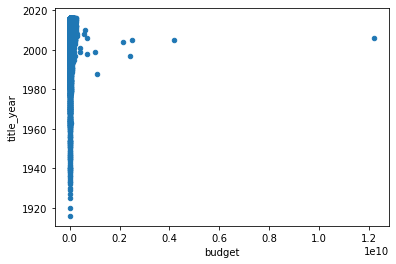

In [132]:
canada_movie.plot(kind="scatter", x="budget", y="title_year")

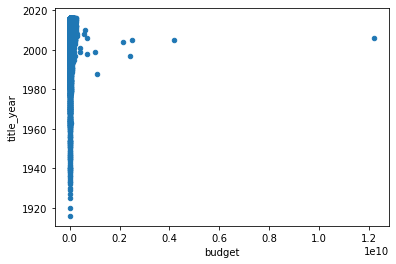

In [133]:
france_movie.plot(kind="scatter", x="budget", y="title_year")

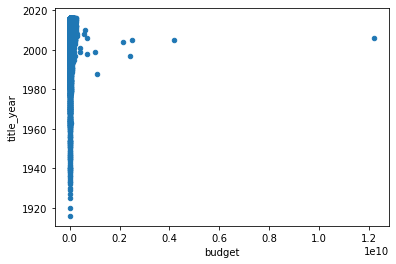

In [134]:
uk_movie.plot(kind="scatter", x="budget", y="title_year")

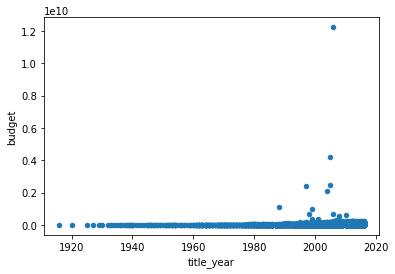

In [139]:
usa_movie.plot(kind="scatter", x="title_year", y="budget")

In [137]:
# Решение через матрицы с интерсептом для Канады
X = canada_movie["title_year"].to_numpy().reshape((len(canada_movie["title_year"].to_numpy()), 1))
Y = canada_movie["budget"].to_numpy().reshape((len(canada_movie["budget"].to_numpy()), 1))
X = np.hstack([np.ones((len(canada_movie["title_year"].to_numpy()), 1)), X])

B = np.dot(np.linalg.inv(np.dot(X.T,X)), np.dot(X.T,Y))

print(f'y = {round(B[0][0], 2)} * x + {round(B[1,0], 2)}')

y = -1475866947.02 * x + 757003.44


(0.0, 100000000.0)

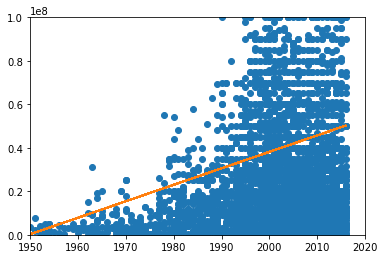

In [150]:
import matplotlib.pyplot as plt

plt.plot(X, B[1][0] * X + B[0][0])
plt.scatter(canada_movie["title_year"].to_numpy(), canada_movie["budget"].to_numpy())
plt.xlim(1950, 2020)
plt.ylim(0, 1e8)

y = -1475866947.02 * x + 757003.44


(0.0, 100000000.0)

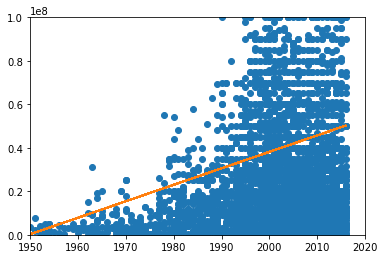

In [151]:
# Решение через матрицы с интерсептом для США
X = usa_movie["title_year"].to_numpy().reshape((len(usa_movie["title_year"].to_numpy()), 1))
Y = usa_movie["budget"].to_numpy().reshape((len(usa_movie["budget"].to_numpy()), 1))
X = np.hstack([np.ones((len(usa_movie["title_year"].to_numpy()), 1)), X])

B = np.dot(np.linalg.inv(np.dot(X.T,X)), np.dot(X.T,Y))

print(f'y = {round(B[0][0], 2)} * x + {round(B[1,0], 2)}')

plt.plot(X, B[1][0] * X + B[0][0])
plt.scatter(usa_movie["title_year"].to_numpy(), usa_movie["budget"].to_numpy())
plt.xlim(1950, 2020)
plt.ylim(0, 1e8)

##### Исходя из модели линейной регрессии можно сказать, что бюджеты фильмов в США и Канаде в следующем году вырастут.